# Proyecto: Análisis de Componentes Principales (PCA)

## Uno de los problemas al que nos enfrentamos al entrenar modelos de Machine Learning, es la alta dimensionalidad de los "features" (ie. una gran cantidad de variables por cada feature). Podemos resolver este problema al reducir la dimensionalidad de los features, lo cual se puede hacer mediante un análisis PCA.

## El análisis PCA nos permite "proyectar" los features hacia un espacio de menor dimensión (el espacio de las componentes principales) que maximiza la varianza, en otras palabras, podemos explicar un alto porcentaje de la información original usando menos variables.

### * En el presente código se muestra un ejemplo en donde se reconstruye el 99% de un dataset usando "pocas" componentes principales

### * Importaremos la función `PCA` de la librería `SciKit Learn`

Si el dataset esta determinado por las variables: $X = [X_{1}, X_{2}, \cdots , X_{p}]$ , donde cada variable $[X_{i}]_{n \times 1}$ es una columna (componente) de del dataset.

El análisis de componentes principales (PCA) permite reducir la dimensión del dataset original $X$ de tal forma que se pueda explicar un alto porcentaje de la información de $X$ con el mínimo número de variables prosibles (ie. con las componentes principales).

PCA reduce la dimensión de $X$ al aplicarle una transformación $W$ tal que $ X \rightarrow Z = [ W \cdot X^{T} ]^{T} $, donde $[W]_{k \times p}$ (con $k<p$) es una matriz que lleva las $p$ variables del dataset original a un conjunto de $k$ componentes principales. Las columnas de $W$ corresponden a los eigenvectores de la matriz de covarianzas. 

In [1]:
import pandas as pd 

import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 

# importamos la función de PCA:
from sklearn.decomposition import PCA 

# importamos función que estandariza los datos,
# ie. resta la media y divide por la desviación estandar (columna por columna)
from sklearn.preprocessing import StandardScaler

In [2]:
# Cargamos dataset:
df = pd.read_csv('./Data/Iris/iris.data',header=None)

In [3]:
# Mostramos información general:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.head() # <--- muestra los primeros 5 registros

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Asignamos nombre a las columnas del dataset
nombres_col = ['longitud_sepalo','ancho_sepalo','longitud_petalo','ancho_petalo','clase']

df.columns = nombres_col
df.head() # <--- muestra los primeros 5 registros

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo,clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### En lo que sigue nos restringiremos a trabajar con las variables de contenido numérico

In [6]:
# Nombre de las columnas con información numérica:
num_cols = ['longitud_sepalo','ancho_sepalo','longitud_petalo','ancho_petalo']

# Número de columnas con información numérica:
nx_vars = len(num_cols)

In [7]:
# Estandarizamos las variables del dataset original

# Declaramos la función que estandariza un dataframe (columna por columna):
ss = StandardScaler()

# Aplicamos el estandarizador a las columnas de información numérica:
df[num_cols]  = ss.fit_transform( df[num_cols]  )
df.head() # <--- muestra los primeros 5 registros

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo,clase
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


In [8]:
# Aplicamos PCA a los datos normalizados, para obtener las componentes principales:

# porcentaje de información a explicar con menos variables:
p_datos = 0.99 # 4
# OBSERVACIÓN: 
# * Si "p_datos" es un numero entre 0 y 1, este indicará porcentaje de información
# * Si "p_datos" es un numero entero, este indicará número de componentes principales

# Declaramos la función PCA:
pca_meth = PCA( n_components=p_datos )

# Aplicamos PCA a los datos numéricos
pca_meth.fit( df[num_cols] )

PCA(n_components=0.99)

In [9]:
# Extraemos número de componentes principales que explican el porcentaje de los datos:
nc_pca = pca_meth.n_components_

print('Para preservar el',p_datos*100,'% de la infromación sólo se requieren',nc_pca,'componentes principales')

Para preservar el 99.0 % de la infromación sólo se requieren 3 componentes principales


### ¡Se requieren 3 componentes principales para explicar el 99% de los datos!

In [10]:
# Asignamos nombre a las componetes principales:
name_pca = []
for i in range(nc_pca):
    name_pca.append('PCA'+str(i+1))
name_pca

['PCA1', 'PCA2', 'PCA3']

In [11]:
# Extraemos las componentes de la transformación [W] (de k x p) que lleva el dataset original
# de "p" variables a un dataset reducido de "k" componentes principales (con k < p). 

W = pca_meth.components_
W

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ]])

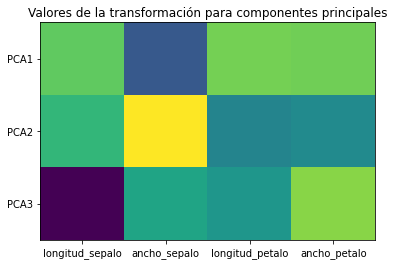

In [12]:

plt.imshow(W, cmap='viridis', aspect='auto')
plt.yticks( range( W.shape[0] ), name_pca)
plt.xticks( range( W.shape[1] ), df[num_cols].columns)
plt.title('Valores de la transformación para componentes principales')

plt.show()

### La matriz anterior indica el peso que tiene cada componete principal con respecto a las componentes originales
### de aquí podemos identificar las variables con más peso en el dataset. 

In [13]:
# Tranfomramos los datos originales al espacio de componentes principales:
Z = pca_meth.transform( df[num_cols] )

# Dado que la salida es un arreglo de "numpy", ahora la transformamos a un "dataframe":
Z = pd.DataFrame(Z , columns = name_pca)
Z.head()

,PCA1,PCA2,PCA3
0,-2.264542,0.505704,-0.121943
1,-2.086426,-0.655405,-0.227251
2,-2.367950,-0.318477,0.051480
3,-2.304197,-0.575368,0.098860
4,-2.388777,0.674767,0.021428


In [22]:
# Dimensión de registros en el espacio de componentes principales:
Z.shape

(150, 3)

In [23]:
# Dimensión de registros en el espacio original:
df[num_cols].shape

(150, 4)

In [14]:
### OBSERVACIÓN: La transformación de los datos originales al espacio de componente principales 
### también se puede obtener mediante: Z = ( W*X' )'

z2 =  (np.dot(W , df[num_cols].T)).T
z2 = pd.DataFrame(z2)
z2.head()

,0,1,2
0,-2.264542,0.505704,-0.121943
1,-2.086426,-0.655405,-0.227251
2,-2.367950,-0.318477,0.051480
3,-2.304197,-0.575368,0.098860
4,-2.388777,0.674767,0.021428


### Obs: Podemos usar los datos en el espacio de componentes principales (menos variables que explican un alto porcentaje de los datos originales) como Features para entrenar modelos de Machine Learning 

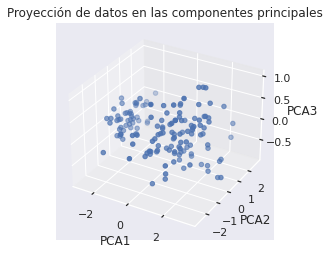

In [15]:
# Graficamos la proyección de las variables en el espacio de componentes principales
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

pca1 = Z[name_pca[0]]
pca2 = Z[name_pca[1]]
pca3 = Z[name_pca[2]]

ax.set_xlabel(name_pca[0])
ax.set_ylabel(name_pca[1])
ax.set_zlabel(name_pca[2])

ax.scatter(pca1, pca2, pca3 )

plt.title('Proyección de datos en las componentes principales')
plt.show()

# Comprobación de los resultados del análisis de componentes principales.

### Anteriormente vimos que: se requieren 3 componentes principales para explicar el 99% de los datos

In [16]:
# Analizamos las proporciones de varianza explicada:

# Varianza total del dataset original
var_X = df.var().sum()
print('\nVarianza total del dataset original:',var_X)

# Varianza de cada componente principal:
Var_pca_i = Z.var()
print('\nVarianza de cada componente principal:')
print(Var_pca_i)

# Proporción de varianza explicada por cada componente principal:
expl_Var = Var_pca_i/var_X
print('\nProporción de varianza explicada por cada componente principal:')
print(expl_Var)

# Varianza acumulada en cada componente principal:
cumul_Var = expl_Var.cumsum()
print('\nVarianza acumulada desde la primer hasta la última componete principal:')
print(cumul_Var)


Varianza total del dataset original: 4.026845637583893

Varianza de cada componente principal:
PCA1    2.930354
PCA2    0.927404
PCA3    0.148342
dtype: float64

Proporción de varianza explicada por cada componente principal:
PCA1    0.727705
PCA2    0.230305
PCA3    0.036838
dtype: float64

Varianza acumulada desde la primer hasta la última componete principal:
PCA1    0.727705
PCA2    0.958010
PCA3    0.994848
dtype: float64


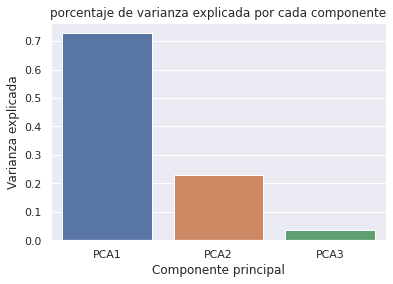

In [17]:
# Graficamos porcentaje de varianza explicada por cada componente principal
sns.barplot(x=name_pca, y=expl_Var)
plt.xlabel('Componente principal')
plt.ylabel('Varianza explicada')
plt.title('porcentaje de varianza explicada por cada componente')
plt.show()

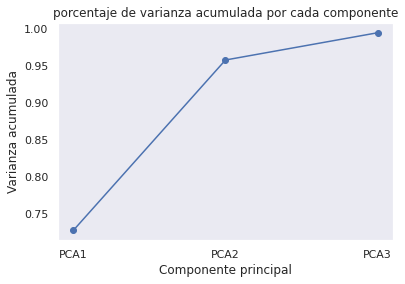

In [18]:
# Graficamos porcentaje de varianza acumulada por cada componente principal
#sns.barplot(x=name_pca, y=cumul_Var)
plt.plot(cumul_Var,'o-')
plt.grid()
plt.xlabel('Componente principal')
plt.ylabel('Varianza acumulada')
plt.title('porcentaje de varianza acumulada por cada componente')
plt.show()

### Del análisis de componentes principales podemos concluir que, en efecto,
### ¡Se requieren 3 componentes principales para explicar el 99% de los datos!

# A continuación aplicamos transformación inversa para reconstruir un porcentaje del dataset original a partir de las pocas componentes principales 

In [19]:
# Aplicamos transformación inversa para ir del espacio de componentes principales al espacio de datos originales:

X_recostruc = pca_meth.inverse_transform(Z)
X_recostruc = pd.DataFrame(X_recostruc ,columns= num_cols)
X_recostruc.head()

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo
0,-0.906726,1.034921,-1.322787,-1.325057
1,-1.170057,-0.112146,-1.258587,-1.367011
2,-1.392643,0.341302,-1.375846,-1.327545
3,-1.489147,0.098214,-1.337532,-1.278260
4,-1.012051,1.258818,-1.371233,-1.293398


In [20]:
# OBSERVACIÓN: La transformación inversa
# también se puede obtener mediante: X = ( inv(W)*Z' )'

W_inv = np.linalg.pinv(W)# como W no necesariamente es cuadrada, usamos la pseudoinversa de Moore-Penrose "pinv"

X_recostruc2 =  (np.dot(W_inv , Z.T)).T
X_recostruc2 = pd.DataFrame(X_recostruc2)
X_recostruc2.head()

,0,1,2,3
0,-0.906726,1.034921,-1.322787,-1.325057
1,-1.170057,-0.112146,-1.258587,-1.367011
2,-1.392643,0.341302,-1.375846,-1.327545
3,-1.489147,0.098214,-1.337532,-1.278260
4,-1.012051,1.258818,-1.371233,-1.293398


In [21]:
# Dataset original:
df.head()

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo,clase
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


### Para desestandarizar los datos, debemos multiplicar por la desviación estandar y sumar la media correspondientemente en cada columna